In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import pandas as pd

from IPython.display import clear_output
%matplotlib inline

## Linear Model/Regression
Save .csv file from https://www.randomservices.org/random/data/Galton.html

Another source: https://raw.githubusercontent.com/data-8/materials-fa17/master/lec/galton.csv

F. Galton introduced the term _regression._ In the figure below you can see that "extremely tall parents tend to have children who are taller than average and extremely small parents tend to have children who are smaller than average, but in both cases the children tend to be closer to the average than were their parents". (Stephen Senn _Francis Galton and regression to the mean._ Significance, Vol. 8, Iss. 3)

![title](https://upload.wikimedia.org/wikipedia/commons/b/b2/Galton%27s_correlation_diagram_1875.jpg)
**Francis Galton.** *Regression towards mediocrity in hereditary stature.* The Journal of the Anthropological Institute of Great Britain and Ireland. 15: 246–263 (1886)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anton-selitskiy/The-Art-of-ML/main/Galtons%20Height%20Data.csv')

In [4]:
df.head() #df.tail(6)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [5]:
df["Average Hight"] = (df["Father"]+df["Mother"])/2

In [6]:
X, y = df[['Average Hight']], df['Height']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
w0, w1 = reg.intercept_, reg.coef_[0]

In [13]:
reg.score(X_test, y_test)

0.05375968323617275

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


Text(0, 0.5, "Child's Height")

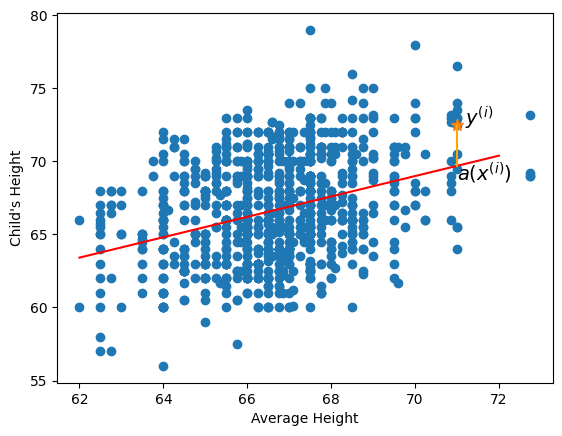

In [14]:
plt.scatter(X['Average Hight'], y)
plt.plot([62, 72], [w0+w1*62, w0+w1*72], c='r')
plt.scatter([X.iloc[5]],[y.iloc[5]], marker='*', s=80)
plt.plot([X.iloc[5,0], X.iloc[5,0]], [y.iloc[5], w0+w1*X.iloc[5,0]], c='orange')
plt.text(X.iloc[5,0]+0.2, y.iloc[5],'$y^{(i)}$', size=14)
plt.text(X.iloc[5,0], w0+w1*X.iloc[5,0]-1,'$a(x^{(i)})$', size=14)
plt.xlabel('Average Height')
plt.ylabel('Child\'s Height')

In [21]:
class MyLinearRegression:
    """
    Parameters
    ----------
    regularization : {None, 'l2'}, default=None  //we will introduce later 'l1' and both

    weight_calc : {'matrix', 'gd', 'sgd'}, default='matrix'
         'matrix',  'gd' (gradient descent), or 'sgd' (stochastic gradient descent)

    Attributes
    ----------
    coefs_ : vector (p, 1) of coefficients, where p is the number of fatures
    intercept_ : bias term
    """

    def __init__(self, regularization=None, weight_calc='matrix', alpha=None, lr=1e-3, batch_size=20):
        if regularization not in [None, 'l2']:
            raise TypeError(f"regularization can not be '{regularization}'")
        if weight_calc not in ['matrix', 'gd', 'sgd']:
            raise TypeError(f"weight_calc can not be '{weight_calc}'")
        if regularization == 'l2' and alpha is None:
            raise TypeError(f"define the l2 regularization coefficient")

        self.weight_calc = weight_calc
        self.batch_size = batch_size
        self.regularization = regularization
        self.alpha = alpha
        self.lr = lr

        self.coefs_ = None
        self.intercept_ = None
        self.X = None
        self.y = None

    def fit(self, X: pd.DataFrame or np.array, y: pd.Series or np.array, lr=None, max_iter = 1000, warm_start=False):
        #We allow to indicate learning rate in both places: initialization and fit
        if lr==None:
            lr = self.lr

        #Cast data into NumPy and create extended matrix X
        if isinstance(X, pd.DataFrame):
            self.X = np.concatenate([np.ones((len(X),1)), X.to_numpy()],axis=1)
        else:
            self.X = np.concatenate([np.ones((len(X),1)), X],axis=1)
        if isinstance(y, pd.Series):
           self.y = y.to_numpy() #pass # Your code here
        else:
            self.y = y

        if self.weight_calc == 'matrix':
            #Your code is here ╰( ͡° ͜ʖ ͡° )つ──☆*:
            if self.regularization == None:
              w = (np.linalg.inv(self.X.T@(self.X))@self.X.T).dot(self.y)
            self.intercept_ = w[0]
            self.coefs_ = w[1:].reshape(-1,1)


        elif self.weight_calc == 'gd':
            if warm_start:
                if self.coefs_ == None:
                    w = np.zeros(self.X.shape[1])
                else:
                    w = np.vstack([self.intercept_, self.coefs_]).squeeze()
            else:
                w = np.zeros(self.X.shape[1])

            for epoch in range(max_iter):
                #Your code is here ╰( ͡° ͜ʖ ͡° )つ──☆*:
                if self.regularization == None:
                  w = w - lr*2*self.X.T.dot(self.X.dot(w)-self.y)


                if (epoch + 1) % 10 == 0:
                  loss = np.mean((np.dot(self.X, w).squeeze() - self.y)**2)
                  self.plot(epoch, w, lr, loss)

            self.intercept_ = w[0]
            self.coefs_ = w[1:].reshape(-1,1)


        elif self.weight_calc == 'sgd':
            if warm_start:
                if self.coefs_ == None:
                    w = np.zeros(self.X.shape[1])
                else:
                    w = np.vstack([self.intercept_, self.coefs_]).squeeze()
            else:
                w = np.zeros(self.X.shape[1])

            for epoch in range(max_iter):
                #Your code is here ╰( ͡° ͜ʖ ͡° )つ──☆*:

                if (epoch + 1) % 10 == 0:
                  loss = np.mean((np.dot(self.X, w).squeeze() - self.y)**2)
                  self.plot(epoch, w, lr, loss)


    def predict(self, X: pd.DataFrame or np.array):
        '''
        This function takes as input not extended matrix of features X
        returns np.array of size (len(X),)
        '''
        if isinstance(X, pd.DataFrame):
          X = np.concatenate([np.ones((len(X),1)), X.to_numpy()],axis=1)
        else:
          X = np.concatenate([np.ones((len(X),1)), X],axis=1)

        #Your code is here ╰( ͡° ͜ʖ ͡° )つ──☆*:

        w = np.vstack([self.intercept_, self.coefs_]).squeeze()

        return X.dot(w).squeeze()

    def score(self, X: pd.DataFrame or np.array, y: pd.Series or np.array):
        '''
        This function takes as input not extended matrix of features X and target y
        returns the coefficient of determination R^2
        '''
        #Your code is here ╰( ͡° ͜ʖ ͡° )つ──☆*:

        pass

    # def batch_loss(self, X, y):
    #     return np.mean((self.predict(X) - y)**2)

    def plot(self, epoch, w, lr, loss):
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(self.X[:,1], self.y, label="data")
        plt.scatter(self.X[:,1], self.X.dot(w), color="orange", linewidth=5, label="predictions")
        plt.xlabel("Feature 1", fontsize=14)
        plt.ylabel("Target", fontsize=14)
        plt.title(f"SGD batch size = {self.batch_size}, epoch = {epoch}, lr={lr}, RMSE={np.sqrt(loss)}", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

In [22]:
reg = MyLinearRegression(weight_calc='gd')

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

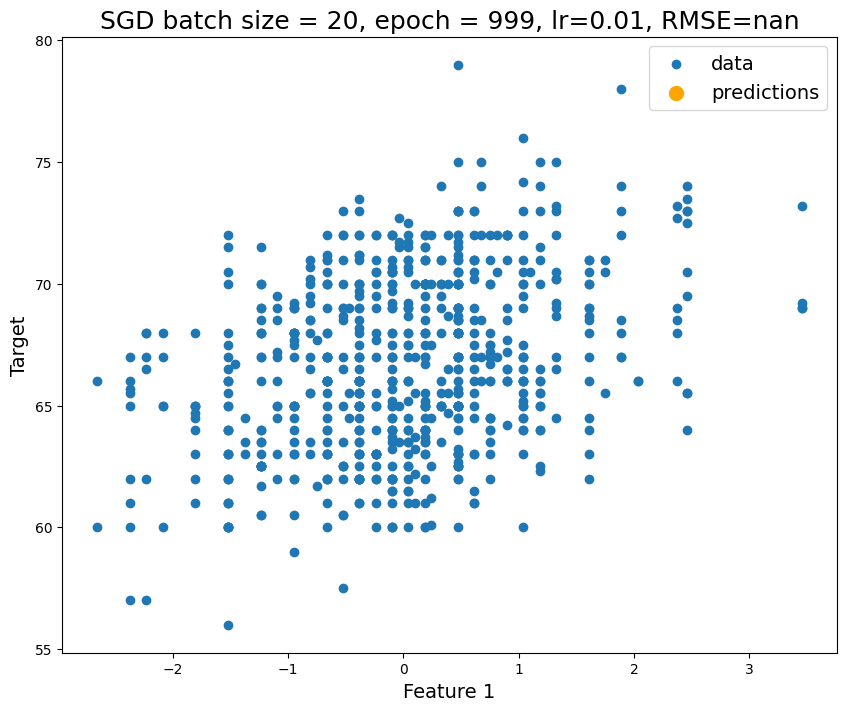

In [28]:
reg.fit(scaler.transform(X_train), y_train, lr=1e-2)

In [18]:
y_test_pred = reg.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.053759683235803934

In [20]:
X, y = df[['Average Hight', 'Gender']], df['Height']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one = OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
transform = ColumnTransformer([('one', one,['Gender']), ('sc', StandardScaler(),['Average Hight'])],remainder='passthrough')

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('preprocessor', transform),
    ('regressor', LinearRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender']),
                                                 ('sc', StandardScaler(),
                                                  ['Average Hight'])])),
                ('regressor', LinearRegression())])

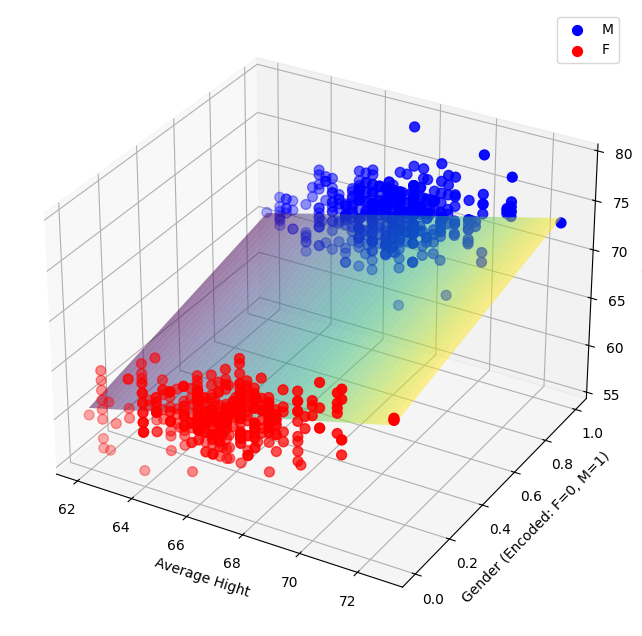

In [ ]:
ave_range = np.linspace(df['Average Hight'].min(), df['Average Hight'].max(), 50)
gender_values = ['M', 'F']
ave_grid, gender_grid = np.meshgrid(ave_range, gender_values)

# Flatten and create a DataFrame for prediction
grid_data = pd.DataFrame({
    'Average Hight': ave_grid.ravel(),
    'Gender': gender_grid.ravel()
})

# Predict the heights for the grid
predicted_heights = pipeline.predict(grid_data).reshape(ave_grid.shape)

# 3D Scatter Plot with Regression Plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data
colors = {'M': 'blue', 'F': 'red'}
for gender in colors:
    subset = df[df['Gender'] == gender]
    ax.scatter(subset['Average Hight'],
               [1 if gender == 'M' else 0] * len(subset),
               subset['Height'],
               color=colors[gender], label=gender, s=50)

# Plot the regression plane
gender_encoded = np.where(gender_grid == 'M', 1, 0)
ax.plot_surface(ave_grid, gender_encoded, predicted_heights, alpha=0.5, cmap='viridis')

# Labels and legend
ax.set_xlabel('Average Hight')
ax.set_ylabel('Gender (Encoded: F=0, M=1)')
ax.set_zlabel('Height')
ax.legend()
plt.show()